<a href="https://colab.research.google.com/github/Suraj0517/DAALab/blob/main/String_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Text length: 1041, Pattern: 'hfjcca'
Text: qdstrkcxyctcoqzihggwgtwfjtdjdutiqspyevsrrutxeuntapjvmbwccjesxbjptbjxvehaelzcnwymoyhfqusjxigpdrlutgiihauctpvntpnrqzvhjcszwzuqsnfgremdhltclojgcnyspyohlndmrpjbnhfprexkhpkgmpkplxlgbatxpkyqvkchzlfzfgwpgozyulbqjzgmmkbdgiqbptwltutjtsnfkuzcibofsdnastiolrkzuwlepytxuaolazdvvnhkhckhcaefmtffylcnrzeeiuqvzvmnpvvkvnfwdbnwobcyhkaerudgzqqmbxpdoymgvurrvvlaspwbipdmbjaxhfmmrksvgmscjpddabnhebxljdcdpbmywlpwtbfckikjhqgezepijrcrlrskrsfnwgmyvoofatggufohckvmaspyslaqupoqjngxhvaubycpnvlufwlijypvjppqjsunjzynyxaeylmwbvofeamgoxshhactaktznpjlhpcxzbldrnxmgutppogffcosqvtdlpcjrzmuzvmlmwhbafqsrsjvskjuojpfdvirlkoebatmpuqyeklmyhexebsfookqzcnhuswjuutebbsodmbzyswimhbgxbjskuisnjhouwkupmdewjcfrmiqyhkjddvnolfqeeajqkqiljyezzjjxevrvkvbmyvitpoticfzknfdavzynfnhsalgkgbpkwbjosxnagmthmpjljvvxqfchulavkqnwyilfaudvpzluycpiztbthlxfwuvlgcxsopphfjccakywnisxahmdybcklfxktgshcqbwogcxgbmdnwbfwyaszmvuukppkfrvbooijagckxphhfqtmfpglmoxfpahcfwffbjuenubjobhiuhxugrrvrazzhougqlllvkqtpcxgdqowfdjwhfjccawtimyzib

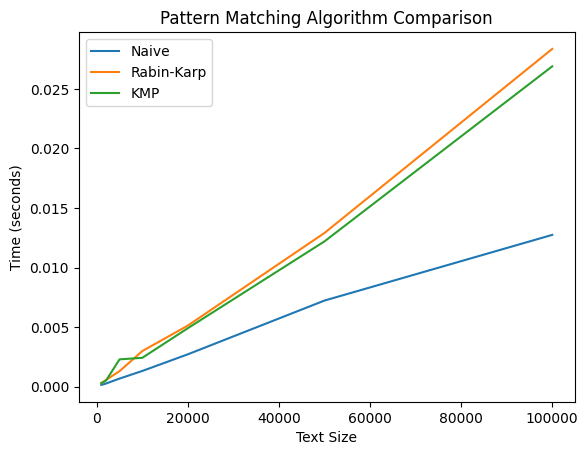

In [5]:
import random
import string
import time
import matplotlib.pyplot as plt

# Naive Search
def naive_search(pat, txt):
    m, n = len(pat), len(txt)
    occurrences = []
    for i in range(n - m + 1):
        if txt[i:i + m] == pat:
            occurrences.append(i)
    return occurrences

# Rabin-Karp Search
def rabin_karp(pat, txt, q=101):
    d = 256
    m, n = len(pat), len(txt)
    p = 0
    t = 0
    h = 1
    occurrences = []

    for _ in range(m-1):
        h = (h * d) % q

    for i in range(m):
        p = (d * p + ord(pat[i])) % q
        t = (d * t + ord(txt[i])) % q

    for i in range(n - m + 1):
        if p == t:
            if txt[i:i + m] == pat:
                occurrences.append(i)
        if i < n - m:
            t = (d * (t - ord(txt[i]) * h) + ord(txt[i + m])) % q
            if t < 0:
                t += q
    return occurrences

# KMP Search
def kmp_search(pat, txt):
    def compute_lps(pattern):
        lps = [0] * len(pattern)
        length = 0
        i = 1
        while i < len(pattern):
            if pattern[i] == pattern[length]:
                length += 1
                lps[i] = length
                i += 1
            else:
                if length != 0:
                    length = lps[length - 1]
                else:
                    lps[i] = 0
                    i += 1
        return lps

    m, n = len(pat), len(txt)
    lps = compute_lps(pat)
    i = j = 0
    occurrences = []

    while i < n:
        if pat[j] == txt[i]:
            i += 1
            j += 1
        if j == m:
            occurrences.append(i - j)
            j = lps[j - 1]
        elif i < n and pat[j] != txt[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return occurrences

# Generate text with random number of occurrences of pattern
def generate_text_with_pattern(text_length, pattern_length, min_occ=3, max_occ=10):
    pattern = ''.join(random.choices(string.ascii_lowercase, k=pattern_length))
    occ_count = random.randint(min_occ, max_occ)

    text_parts = []
    remaining_length = text_length

    for _ in range(occ_count):
        part_length = random.randint(1, max(1, remaining_length - pattern_length * (occ_count - len(text_parts))))
        text_parts.append(''.join(random.choices(string.ascii_lowercase, k=part_length)))
        text_parts.append(pattern)
        remaining_length -= part_length + pattern_length

    # Fill remaining text
    if remaining_length > 0:
        text_parts.append(''.join(random.choices(string.ascii_lowercase, k=remaining_length)))

    text = ''.join(text_parts)
    return pattern, text

# Main
sizes = [1000, 2000, 5000, 10000, 20000,50000,100000]
naive_times, rk_times, kmp_times = [], [], []

for size in sizes:
    pat, txt = generate_text_with_pattern(size, pattern_length=6, min_occ=3, max_occ=8)

    print(f"\nText length: {len(txt)}, Pattern: '{pat}'")
    print("Text:", txt)

    # Naive
    start = time.time()
    occ_naive = naive_search(pat, txt)
    naive_times.append(time.time() - start)

    # Rabin-Karp
    start = time.time()
    occ_rk = rabin_karp(pat, txt)
    rk_times.append(time.time() - start)

    # KMP
    start = time.time()
    occ_kmp = kmp_search(pat, txt)
    kmp_times.append(time.time() - start)

    print(f"Naive found at indices: {occ_naive}")
    print(f"Rabin-Karp found at indices: {occ_rk}")
    print(f"KMP found at indices: {occ_kmp}")

# Plot
plt.plot(sizes, naive_times, label='Naive')
plt.plot(sizes, rk_times, label='Rabin-Karp')
plt.plot(sizes, kmp_times, label='KMP')
plt.xlabel('Text Size')
plt.ylabel('Time (seconds)')
plt.title('Pattern Matching Algorithm Comparison')
plt.legend()
plt.show()
